In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "text.latex.preamble": r"\usepackage[utf8]{inputenc}\usepackage[T1]{fontenc}\usepackage{lmodern}"
})

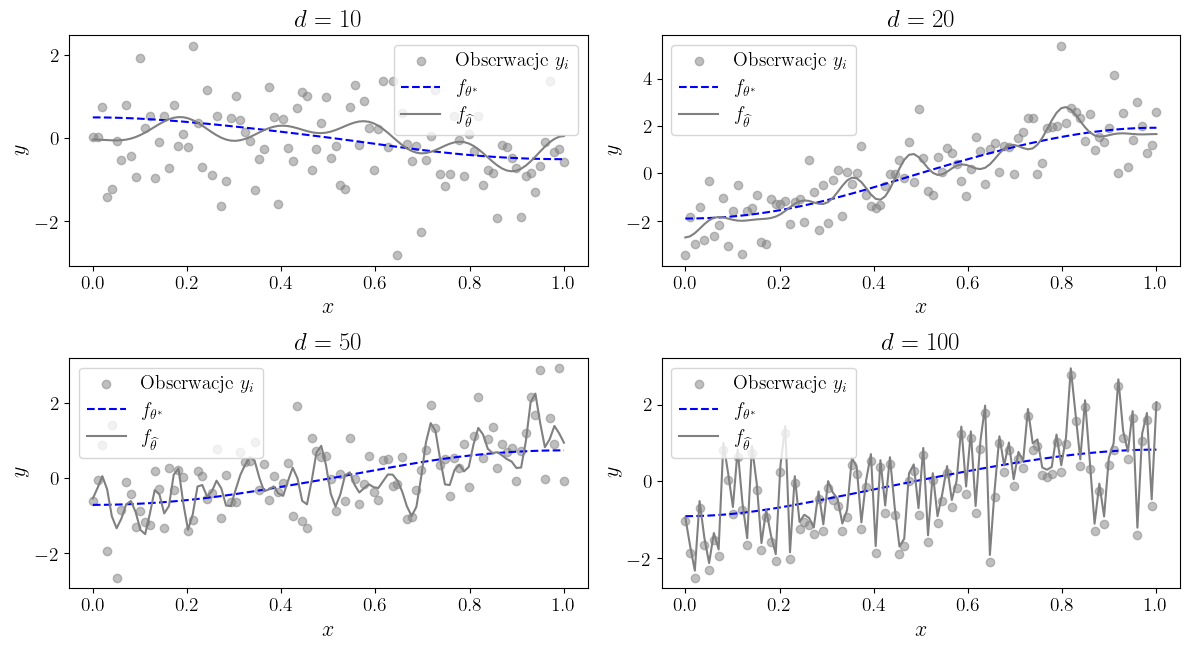

In [2]:
# Funkcja generująca wartości funkcji f_theta dla podanego wektora theta i t
def f_theta(theta, t):
    d = len(theta)  # liczba wymiarów
    return sum(theta[j] * np.cos(np.pi * (j + 1) * t) for j in range(d))

# Funkcja estymująca theta_hat na podstawie wartości obserwacji y
def estimate_theta(X, y):
    return np.linalg.lstsq(X, y, rcond=None)[0]

# Parametry symulacji
n = 100  # liczba próbek
d_values = [10, 20, 50, 100]  # różne wartości wymiaru d
t_values = np.linspace(0, 1, n)  # równomierne wartości t
sigma = 1  # odchylenie standardowe szumu

np.random.seed(42)

# Generowanie wykresów
fig, axes = plt.subplots(2, 2, figsize=(12, 6.6))
axes = axes.flatten() 

for idx, d in enumerate(d_values):
    # Generowanie wektora theta* z rozkładu N(0, j^-4)
    theta_star = np.random.normal(0, [j**-4 for j in range(1, d + 1)])
    
    # Generowanie macierzy X na podstawie funkcji phi(t)
    X = np.array([[np.cos(np.pi * j * t) for j in range(1, d+1)] for t in t_values])
    
    # Generowanie szumu w_i
    noise = np.random.normal(0, sigma, n)
    
    # Generowanie y_i
    y = X @ theta_star + noise
    
    # Estymacja theta_hat za pomocą najmniejszych kwadratów
    theta_hat = estimate_theta(X, y)
    
    # Obliczanie funkcji f_theta* i f_hat_theta
    f_true = np.array([f_theta(theta_star, t) for t in t_values])
    f_estimated = np.array([f_theta(theta_hat, t) for t in t_values])
    
    # Rysowanie wyników
    axes[idx].scatter(t_values, y, color="gray", alpha=0.5, label="Obserwacje $y_i$")
    axes[idx].plot(t_values, f_true, linestyle="--", color="blue", label=r"$f_{\theta^*}$")
    axes[idx].plot(t_values, f_estimated, color="gray", label=r"$f_{\widehat{\theta}}$")
    axes[idx].set_title(f"$d$ = {d}", fontsize=18)
    axes[idx].set_xlabel("$x$", fontsize=16)
    axes[idx].set_ylabel("$y$", fontsize=16)
    axes[idx].tick_params(axis='x', labelsize=14)
    axes[idx].tick_params(axis='y', labelsize=14)
    axes[idx].legend(fontsize=14)

fig.tight_layout()

os.makedirs("zdjecia_symulacji", exist_ok=True)
plt.savefig("zdjecia_symulacji/regresja_przyklad.svg", format="svg")

plt.show()